1: Import Libraries

In [3]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


2: Load Dataset

In [4]:
# Step 2: Load dataset (already downloaded from Kaggle)
file_path = "data.csv"  # replace with actual filename
df = pd.read_csv(file_path)

# Initial checks
print("Shape of dataset:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nFirst 5 rows:")
display(df.head())


Shape of dataset: (569, 33)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


3: Handle Missing Values & Duplicates

In [5]:
# Step 3: Handle missing values and duplicates
print("Missing values:\n", df.isnull().sum())
print("\nNumber of duplicates:", df.duplicated().sum())

# Example handling
df = df.drop_duplicates()
df = df.fillna(df.mean(numeric_only=True))   # numeric NaN → mean
df = df.fillna("Unknown")                   # categorical NaN → placeholder


Missing values:
 id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_wors

4: Convert Categorical Features

In [6]:
# Step 4: Encode categorical variables (if present)
df = pd.get_dummies(df, drop_first=True)

print("Data after encoding:", df.shape)


Data after encoding: (569, 32)


5: Exploratory Data Analysis (EDA)

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

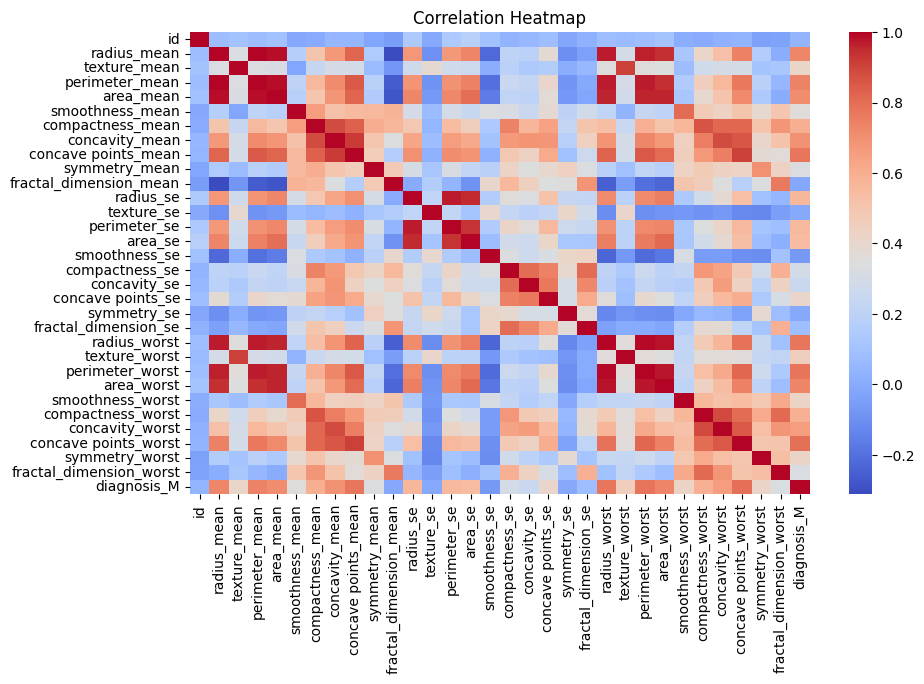

In [7]:
# Step 5: EDA - Summary stats
print(df.describe())

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

# Plotly interactive visualization (example: scatter of two features)
fig = px.scatter(df, x=df.columns[0], y=df.columns[1], color=df.columns[-1])
fig.show()


6: Feature Engineering

In [9]:
# Step 6: Split into X and y
X = df.drop("diagnosis_M", axis=1)   # replace target_column with actual target
y = df["diagnosis_M"]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

7: Model Training (Baseline)

In [10]:
# Step 7: Train models with default parameters
models = {
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

baseline_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    baseline_results[name] = accuracy_score(y_test, y_pred)

print("Baseline Accuracies:", baseline_results)


Baseline Accuracies: {'KNN': 0.956140350877193, 'Decision Tree': 0.9210526315789473, 'Random Forest': 0.956140350877193}


8: Feature Importance (Random Forest)

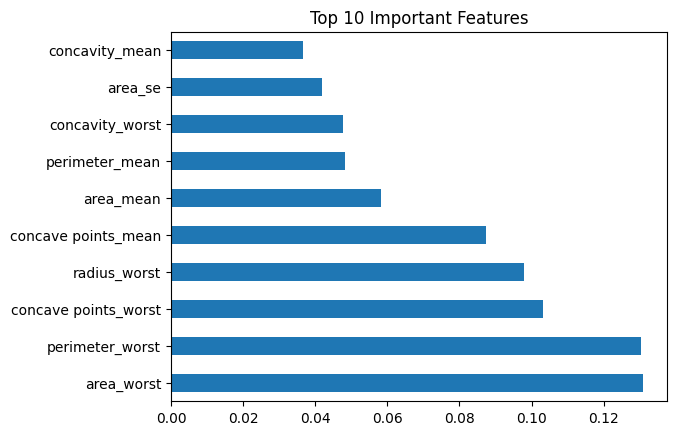

In [11]:
rf = models["Random Forest"]
importances = rf.feature_importances_

# Plot feature importance
feat_importances = pd.Series(importances, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()


9: Hyperparameter Tuning

In [12]:
# Step 9: RandomizedSearchCV tuning

# KNN
param_knn = {"n_neighbors": range(3,15), "weights": ["uniform","distance"], "metric": ["euclidean","manhattan"]}
knn_cv = RandomizedSearchCV(KNeighborsClassifier(), param_knn, cv=5, n_iter=10, scoring="accuracy", random_state=42)
knn_cv.fit(X_train, y_train)

# Decision Tree
param_dt = {"max_depth": [None,5,10,20], "min_samples_split": [2,5,10]}
dt_cv = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), param_dt, cv=5, n_iter=10, scoring="accuracy", random_state=42)
dt_cv.fit(X_train, y_train)

# Random Forest
param_rf = {"n_estimators": [50,100,200], "max_depth": [None,10,20], "min_samples_split": [2,5,10]}
rf_cv = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_rf, cv=5, n_iter=10, scoring="accuracy", random_state=42)
rf_cv.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [None, 10, 20],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='accuracy')

10: Model Evaluation


KNN Results:
Accuracy: 0.9649122807017544
Precision: 0.9651849217638692
Recall: 0.9649122807017544
F1-score: 0.9647247085304307

Classification Report:
               precision    recall  f1-score   support

       False       0.96      0.99      0.97        72
        True       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



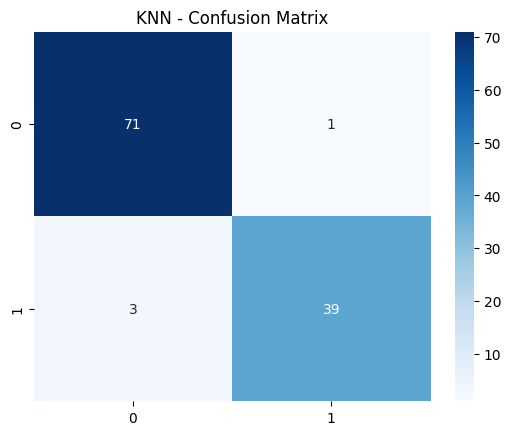


Decision Tree Results:
Accuracy: 0.9210526315789473
Precision: 0.9211336032388665
Recall: 0.9210526315789473
F1-score: 0.9203962286669054

Classification Report:
               precision    recall  f1-score   support

       False       0.92      0.96      0.94        72
        True       0.92      0.86      0.89        42

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114



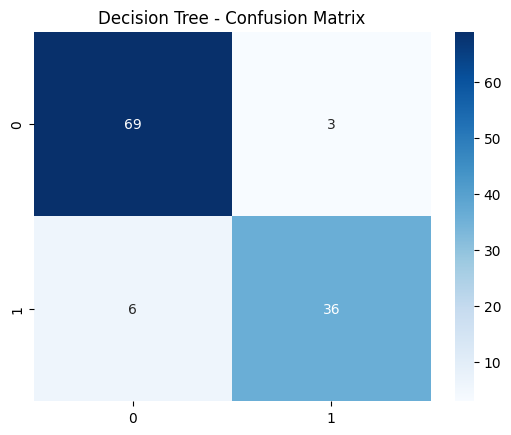


Random Forest Results:
Accuracy: 0.9649122807017544
Precision: 0.966759002770083
Recall: 0.9649122807017544
F1-score: 0.9645092460881936

Classification Report:
               precision    recall  f1-score   support

       False       0.95      1.00      0.97        72
        True       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



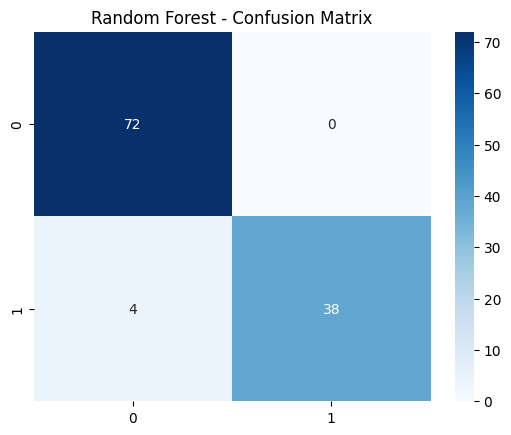

In [13]:
# Step 10: Compare tuned vs baseline
tuned_models = {
    "KNN": knn_cv.best_estimator_,
    "Decision Tree": dt_cv.best_estimator_,
    "Random Forest": rf_cv.best_estimator_
}

for name, model in tuned_models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average="weighted"))
    print("Recall:", recall_score(y_test, y_pred, average="weighted"))
    print("F1-score:", f1_score(y_test, y_pred, average="weighted"))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.show()


11: ROC Curve (Best Model)

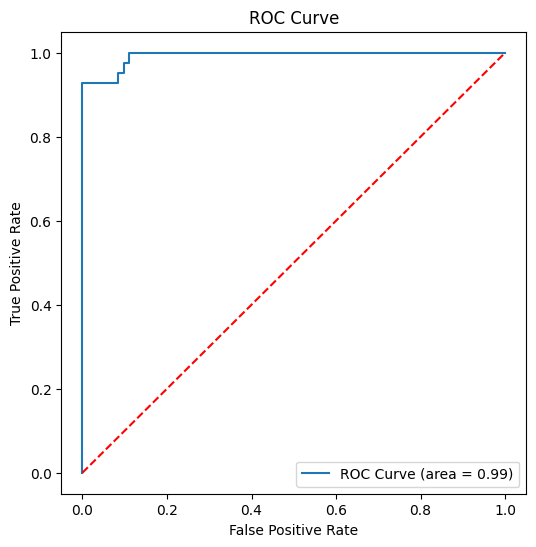

In [14]:
best_model = rf_cv.best_estimator_   # assuming Random Forest is best

y_pred_prob = best_model.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=best_model.classes_[1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"ROC Curve (area = {roc_auc:.2f})")
plt.plot([0,1],[0,1],'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


# Conclusion
- Best model: Random Forest (tuned version).
- Important features: (list top features from feature importance).
- Hyperparameter tuning improved accuracy from X% → Y%.
- Visualizations showed clear trends in feature-target relationships.
